# 图片分类数据集
Fashion-MNIST

----

## 导包

In [6]:
%matplotlib inline
import torch
import torchvision  #图像与处理的包
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

## 通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中

In [11]:
#通过ToTensor实例将图像数据从PIL类型转换为32位浮点数格式
#并除以255使得所有像素的数值都在0~1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=trans, download=True)

len(mnist_train),len(mnist_test)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



(60000, 10000)

In [13]:
mnist_train[0][0].shape
#因为是黑白图片，所以通道数是1，图片大小是28*28

torch.Size([1, 28, 28])

## 两个可视化数据集的函数
Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。

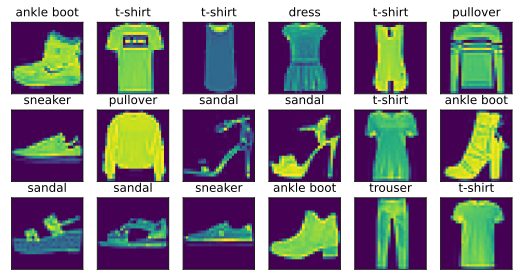

In [16]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

#运行
#读取数据
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 3, 6, titles=get_fashion_mnist_labels(y));

## 读取一小批量数据，大小为batch_size

In [19]:
batch_size = 256

"""采用不同进程来读取数据，一般来说，读数据要比训练快很多才比较好"""
def get_dataloader_workers():
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

timer = d2l.Timer()

#读一轮数据的时间
for X, y in train_iter:
    continue
f'{timer.stop():.2f}sec'
#2个进程9.00sec,3个进程6.87sec,4个进程5.71sec

'5.71sec'

## 定义load_data_fashion_mnist函数

In [20]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion_MNIST数据集，然后加载到内存里"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)  #一般用Compose把多个步骤整合到一起
    mnist_train = torchvision.datasets.FashionMNIST(root="./data",
                                                   train=True,
                                                   transform=trans,
                                                   download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="./data",
                                                  train=False,
                                                  transform=trans,
                                                  download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_test,batch_size,shuffle=False, num_workers=get_dataloader_workers()))

In [21]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
